![example](images/director_shot.jpeg)

# Microsoft Movie Studio Data Analysis and Recommendations

**Author:** Alexis Kedo
***

## Overview

This project analyzes selected characteristics of movies produced from 2010 onward, in order to provide a set of recommendations to guide the actions of a corporation, Microsoft, in its goal to open a movie production studio. The data comes from the [Internet Movie Database (IMDB)](https://www.imdb.com/interfaces/), [The Numbers](https://www.the-numbers.com/), [Box Office Mojo](https://www.boxofficemojo.com/), [The Movie Database](https://www.themoviedb.org/?language=en-US), and [Rotten Tomatoes](https://www.rottentomatoes.com/), courtesy of [Flatiron School](https://flatironschool.com/). Descriptive analysis of film release and earnings data shows that a film's popularity varies seasonally and that Microsoft should limit its production efforts to a few genres in order to maximize profitability. Furthermore, a sampling and analysis of most popular actors shows that Microsoft should concentrate their hiring on a select pool of actors who are relatively likely to maximize return on investment. 

## Business Problem

As a novice entree into the film production industry, Microsoft faces steep competition from a host of more established firms, includng Netflix, Amazon, and Hulu. In addition, Microsoft's primary software competitor, Apple, has been producing its own feature-length content since [2019](https://www.nytimes.com/2019/09/27/business/media/apple-movie-theaters.html). In order to produce movies that can stand up to the output of its competitors, Microsoft will likely need to expend billions in start-up costs, which makes its initial investment decisions especially important. Amazon spent [5 billion dollars](https://www.nasdaq.com/articles/does-amazon-profit-its-original-tv-shows-movies-2018-03-15) on "original programming" 
in 2018, while Netflix spend $8 billion. 

While most pre-production costs (e.g. insurance, equipment rental, crew staffing costs) are more or less fixed, "above-the-line"  (i.e. creative) costs can vary widely. As actor salaries constitute [a significant](https://www.forbes.com/sites/schuylermoore/2019/04/13/the-importance-of-film-budgets/?sh=2df1507727f5) portion, it makes sense to concentrate part of this analysis on on-screen talent. Release month is also a major decision point around which there has been [some](https://www.newyorker.com/magazine/2015/02/23/rethinking-seasonal-strategy) questioning of the traditional strategy of releasing blockbusters over the summer and prestige films prior to awards season. Finally, the all-important question of what genres will generate the most return on investment is a debate that [continues](https://grayll.medium.com/the-most-profitable-film-genres-e91d5fb4cfa5) to [rage](https://www.mentalfloss.com/article/68552/20-most-profitable-movies-all-time-based-return-investment). For these reasons, I have concentrated my analysis on these three major areas. 

## Data Understanding
As stated above, datasets were pulled from a variety of online sources. IMDB datasets were the most used files in this analysis and provide unique IDs for both movies and actors. IMDB files also supply various characteristics about movies (start year, genre) and actors (birth year, death year, average ratings per movie). The "budgets" dataset from The Numbers was also used to provide gross worldwide earnings information. The sample included movies released after 2010. Actor data was narrowed to include only actors born after 1940. 

The three main decision-making areas addressed by this project were release month, genre, and available actors. The target variables for anlysis were average popularity (used for both seasonality and actor analysis), average worldwide gross earnings (used for genre analysis), average ratings per movie (used for actor analysis), and net worth (used to create a scale to represent the approximate 'cost ' of hiring a particular actor). 

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
#Import and explore data. 
imdb_names = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
imdb_titles_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
imdb_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
imdb_principals = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
moviedb_movies = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')

In [3]:
moviedb_movies
#This dataset, from the Movie Database, will be the foundation of the seasonality analysis for Analysis 1. 

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [4]:
imdb_titles_basics.sort_values(by=['start_year'],ascending=True)
#This titles dataset will be the basis for the genre/profitability analysis (Analysis 2), 
#and is a mid-size dataset with 146,144 unique movies. 
#It includes only movies that started production after 2010. 

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
9599,tt1566491,Brainiacs in La La Land,Brainiacs in La La Land,2010,NaN,Comedy
43264,tt2578092,Fireplace for your Home: Crackling Fireplace w...,Fireplace for your Home: Crackling Fireplace w...,2010,61.0,Music
11550,tt1634300,Role/Play,Role/Play,2010,85.0,"Drama,Romance"
11551,tt1634332,Johan1,Johan Primero,2010,78.0,"Comedy,Drama,Romance"
11552,tt1634334,Hands Up,Les mains en l'air,2010,90.0,Drama
...,...,...,...,...,...,...
2948,tt10300396,Untitled Star Wars Film,Untitled Star Wars Film,2024,NaN,NaN
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy"
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy"


In [5]:
budgets
#This relatively small dataset will be merged with the IMDB titles dataset 
#to display financial attributes of unique movies when conducting a genre analysis in Analysis 2. 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
imdb_ratings
#This dataframe shows average ratings and number of votes for each unique movie ID ("tconst"), and will
#be important to our analysis of actor performance (Analysis 3) 

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [7]:
imdb_principals
#This dataframe shows unique IDS for all "principals" (generally those that appear in title credits). 
#This will be important in the actor analysis (Analysis 3). 

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [8]:
imdb_names
#This dataset is critical to identifying names of all actors based on their unique identifier ("nconst"), 
#in Analysis 3. 

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


## Analysis 1: In which months should Microsoft schedule their film releases? 
For this analysis, the Movie Database dataframe was used to create a model that will be useful in determining the optimal release month. 

### Data Cleaning
This dataframe contained 26,527 movies, 2,027 of which were duplicated movies. Data cleaning actions included re-formatting the column titles in the dataframe, aggregating and dropping duplicates, and converting release data data to a DateTime object. 

Here, I also work on cleaning the "Budgets" dataframe, which will be used in Analysis #2. 

In [9]:
# Standardize movie titles across dataframes. 
budgets['movie'] = budgets['movie'].str.replace(' ', '_').str.lower().str.replace('[^\w\s]','')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",pirates_of_the_caribbean_on_stranger_tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",dark_phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",avengers_age_of_ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",star_wars_ep_viii_the_last_jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
moviedb_movies['title'] = moviedb_movies['title'].str.replace(' ', '_').str.lower().str.replace('[^\w\s]','')
moviedb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,harry_potter_and_the_deathly_hallows_part_1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,how_to_train_your_dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,iron_man_2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,toy_story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,inception,8.3,22186


In [11]:
budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [12]:
moviedb_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [13]:
moviedb_dupes = moviedb_movies.loc[moviedb_movies.duplicated(subset=['title', 'release_date'], keep='first') == True]
moviedb_dupes.sort_values(by=['title'],ascending=True)
#Duplicated values account for less than 4% of data, so I will leave these be. 

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
14850,14850,"[18, 10749]",253251,en,10.000 KM,4.205,2015-07-10,10000_km,6.5,49
21096,21096,[18],334532,en,100 Streets,7.317,2016-06-08,100_streets,6.2,91
22224,22224,"[18, 80]",394770,en,11:55,1.400,2017-06-09,1155,5.0,8
21298,21298,"[18, 10749]",416691,en,1 Night,5.409,2017-02-10,1_night,6.4,107
20839,20839,[18],342737,en,20th Century Women,10.413,2016-12-28,20th_century_women,7.4,504
...,...,...,...,...,...,...,...,...,...,...
15026,15026,"[35, 18]",270886,fr,Tu dors Nicole,2.835,2014-10-09,youre_sleeping_nicole,6.7,23
21681,21681,"[35, 18]",338387,en,Youth in Oregon,2.534,2017-02-03,youth_in_oregon,6.3,19
24629,24629,[18],326382,es,Zama,5.671,2017-09-30,zama,6.9,50
15061,15061,"[10751, 16]",94196,fr,Zarafa,2.705,2012-11-11,zarafa,6.8,39


In [14]:
# Change release date column into DateTime format. 
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,pirates_of_the_caribbean_on_stranger_tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [15]:
moviedb_movies['release_date'] = pd.to_datetime(moviedb_movies['release_date'])
moviedb_movies.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,harry_potter_and_the_deathly_hallows_part_1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,how_to_train_your_dragon,7.7,7610


### Data Modeling

In [16]:
# Make another column ("month") containing just the month from the "release_date" column. 
moviedb_movies["month"] = moviedb_movies["release_date"].dt.month
moviedb_movies.head()

clean_moviedb = moviedb_movies.drop(columns = ['Unnamed: 0', 'id', 'original_language', 'original_title'], axis = 1)

In [17]:
# Change datatype of ['month'] column to string
clean_moviedb['month'] = clean_moviedb['month'].astype('str')

# Enumerate to replace values in ['month'] with names of months 

for i, element in enumerate(clean_moviedb['month']): 
    if element == '1':
        clean_moviedb['month'][i] = 'January'
    elif element == '2': 
        clean_moviedb['month'][i] = 'February'
    elif '3' in element: 
        clean_moviedb['month'][i] = 'March'
    elif '4' in element: 
        clean_moviedb['month'][i] = 'April' 
    elif '5' in element:
        clean_moviedb['month'][i] = 'May'
    elif '6' in element: 
        clean_moviedb['month'][i] = 'June'
    elif '7' in element: 
        clean_moviedb['month'][i] = 'July'
    elif '8' in element: 
        clean_moviedb['month'][i] = 'August'    
    elif '9' in element:
        clean_moviedb['month'][i] = 'September'
    elif '10' in element: 
        clean_moviedb['month'][i] = 'October'
    elif '11' in element: 
        clean_moviedb['month'][i] = 'November'
    elif '12' in element: 
        clean_moviedb['month'][i] = 'December' 
        
clean_moviedb.head()

<ipython-input-17-4611ba133348>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_moviedb['month'][i] = 'November'
<ipython-input-17-4611ba133348>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_moviedb['month'][i] = 'March'
<ipython-input-17-4611ba133348>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_moviedb['month'][i] = 'May'
<ipython-input-17-4611ba133348>:20: SettingWithCopyWarning: 
A value is trying to be

,genre_ids,popularity,release_date,title,vote_average,vote_count,month
0,"[12, 14, 10751]",33.533,2010-11-19,harry_potter_and_the_deathly_hallows_part_1,7.7,10788,November
1,"[14, 12, 16, 10751]",28.734,2010-03-26,how_to_train_your_dragon,7.7,7610,March
2,"[12, 28, 878]",28.515,2010-05-07,iron_man_2,6.8,12368,May
3,"[16, 35, 10751]",28.005,1995-11-22,toy_story,7.9,10174,November
4,"[28, 878, 12]",27.920,2010-07-16,inception,8.3,22186,July


In [18]:
clean_moviedb['month'].value_counts()

January      3132
October      3035
April        2566
March        2406
November     2338
September    2264
June         2166
December     1929
May          1865
August       1698
February     1614
July         1504
Name: month, dtype: int64

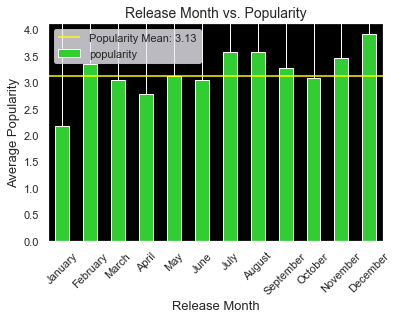

In [108]:
#Plot by Month and Average Popularity to figure out the most popular month to release movies. 

#Make the group of the data according to their release month, find the mean popularity related to this, and plot.
from matplotlib import pyplot as plt
moviedb_movies.groupby('month')['popularity'].mean().plot(kind = 'bar', color='limegreen')

#Set up the title of the graph. 
plt.title("Release Month vs. Popularity",fontsize = 14)

#Setup the x-axis label and y-axis label of the graph.
plt.xlabel('Release Month',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)
axes = plt.gca()
axes.yaxis.grid()
axes.set(facecolor='black')

#Insert mean popularity
plt.hlines(y=moviedb_movies['popularity'].mean(),xmin=-.5, xmax=11.5,color='yellow',
           label=f"Popularity Mean: {moviedb_movies['popularity'].mean():.2f}") 

# Change x-axis tick labels to display names (not numbers) of months. 
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],rotation=45)  # Set text labels and properties.
plt.legend()
plt.savefig('months.png', dpi=300, bbox_inches='tight')
plt.show()

### Analysis and Recommendations
There is plenty in the above chart to support the traditional filmmaking calculus that the summer months between May-August, combined with the holiday months of November and December, will yield the largest audience response. 

This ["clustering"](https://www.newyorker.com/magazine/2015/02/23/rethinking-seasonal-strategy) strategy may have some truth to it; people are indeed probably more likely to go to the movies when they have more free time in the warmer months and over the winter holidays. However, the trend may also be more of a self-fulfilling prophecy than anything else. The popularity spikes apparent in July, August, November, and December may have more to do with the fact that studios are already cramming movies that executives know will draw crowds into these months. 

Thus, the optimal opening month may vary depending on the type of movie being released. If the client is producing a movie based on a Microsoft-owned franchise that is popular in its own right (e.g. Call of Duty, Minecraft) and that Microsoft executives believe could occupy a large market share of movies released during the film industry's "cluster" months, then it may indeed make sense to plan release dates during the summer holidays. 

However, if the film being released is an original concept and/or there is more uncertainty surrounding its reception, Microsoft should consider scheduling their release for February or September. These "off-peak" months have historically been deemed ['dump months'](https://en.wikipedia.org/wiki/Dump_months) in the industry. However, contrary to this belief and as shown in the above chart, movies released after 2010 have enjoyed above-average popularity for February and September. Thus, there is a likelihood that movies released during these two months would out-perform those released during other off-peak months. Moreover, movies not anticipated to be big commercial successes may fare better being released in either February or September than during the cluster months of June, July, November, or December. 

Further analysis would be helpful in order to understand the seasonal crowding trends by month; in particular, it would be helpful to ascertain if the increase in popularity during peak months is due simply to studios' tendency to schedule guaranteed blockbusters during these months. This could be done through comparing the count of movies released per month against the average popularity per month. 

## Analysis 2: Which genres should Microsoft prioritize for production? 
For this analysis, IMDB data was cleaned and combined with budgets data to identify the most profitable genres. 

In [23]:
#Getting an idea of the most common genres. 
imdb_titles_basics['genres'].value_counts()

Documentary                  32185
Drama                        21486
Comedy                        9177
Horror                        4372
Comedy,Drama                  3519
                             ...  
Crime,Music                      1
Drama,Short,Western              1
Documentary,Romance,Sport        1
Adventure,Animation,Crime        1
Horror,Sport,Thriller            1
Name: genres, Length: 1085, dtype: int64

In [24]:
#There are some movies with null values, but...
imdb_titles_basics['genres'].isna().sum()

5408

In [25]:
#...They make up less than 4% of the data, so we will just fill them with "Unknown."
imdb_titles_basics['genres'].isna().sum()/len(imdb_titles_basics)

0.037004598204510616

In [26]:
imdb_titles_basics['genres'] = imdb_titles_basics['genres'].fillna("Unknown")

In [27]:
# Get a unique genres list. 
unique_genres_list = []
for genre_details in imdb_titles_basics['genres']: 
    genres_list = genre_details.split(",")
    for genre in genres_list: 
        unique_genres_list.append(genre)

unique_genres_list = sorted(list(set(unique_genres_list)))

In [28]:
unique_genres_list

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'Unknown',
 'War',
 'Western']

In [29]:
# Create columns for each unique genre
for genre in unique_genres_list: 
    imdb_titles_basics[genre]=0

In [30]:
# Use a loop to populate those genre columns
# Code courtesy of Lindsey Berlin 
for index, genre_details in enumerate(imdb_titles_basics['genres']): 
    for genre in unique_genres_list: 
        if genre in genre_details: 
            #If a genre is in te genres column for that row, it'll add a 1 to that genre's column
            imdb_titles_basics.at[index,genre] = 1
            # This is the same as imdb[genre][index] = 1, but pandas like .at more than using the above syntax

In [31]:
imdb_titles_basics.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Preparing to join imdb_titles_basics wtih budgets dataframe
# Since we will join both dataframes on movie titles, we should standardize titles. 
imdb_titles_basics['primary_title'] = imdb_titles_basics['primary_title'].str.replace(' ', '_').str.lower().str.replace('[^\w\s]','')
imdb_titles_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,one_day_before_the_rainy_season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,the_other_side_of_the_wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,sabse_bada_sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,the_wandering_soap_opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
budgets['movie'] = budgets['movie'].str.replace(' ', '_').str.lower().str.replace('[^\w\s]','')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,pirates_of_the_caribbean_on_stranger_tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,dark_phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,avengers_age_of_ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,star_wars_ep_viii_the_last_jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [34]:
# Drop unneeded columns in IMDB dataframe. 
imdb = imdb_titles_basics.drop(columns = ['original_title', 'runtime_minutes'])
imdb.head()

,tconst,primary_title,start_year,genres,Action,Adult,Adventure,Animation,Biography,Comedy,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,sunghursh,2013,"Action,Crime,Drama",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,one_day_before_the_rainy_season,2019,"Biography,Drama",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,the_other_side_of_the_wind,2018,Drama,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,sabse_bada_sukh,2018,"Comedy,Drama",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,the_wandering_soap_opera,2017,"Comedy,Drama,Fantasy",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#Sort by title identifier to see movies in alphabetical order
imdb = imdb.sort_values(by=['primary_title'])

In [36]:
# Check for rows with duplicate titles and years in IMDB dataframe 
imdb_dupes = imdb.loc[imdb.duplicated(subset=['primary_title', 'start_year'], keep=False) == True]

In [37]:
imdb_dupes.shape

(4290, 32)

In [38]:
#Reminding myself the size of total dataset and calculating what % of it is duplicated data 
imdb.shape
4290/146144

0.029354609152616597

In [39]:
# Duplicates account for less than 3% of data; I'm going to drop them because they are inaccurate. 
# For example the film "88" was researched and it is a thriller, not a family or documentary film.
imdb_clean = imdb.drop_duplicates(subset=['primary_title','start_year'], keep=False,)

In [40]:
#Rename "primary_title" column to "movie" to match budgets dataframe 
imdb_clean = imdb_clean.rename(columns={"primary_title": "movie"})
imdb_clean

,tconst,movie,start_year,genres,Action,Adult,Adventure,Animation,Biography,Comedy,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
4642,tt10423688,,2019,"Fantasy,Sci-Fi",0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
107424,tt6290346,,2013,"Crime,Documentary",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139783,tt9046926,0000_a_shark_odyssey,2018,"Animation,Comedy,Musical",0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
145395,tt9811798,0009_the_sharks_make_contact,2019,"Animation,Comedy,Musical",0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3174,tt10315070,0010_the_sharks_make_contact__part_2,2020,"Animation,Comedy,Sci-Fi",0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143884,tt9598594,üç_harfliler_adak,2019,"Horror,Thriller",0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
134885,tt8514766,üç_harflilerin_musallat_oldugu_büyülü_konakta_...,2018,"Comedy,Horror,Thriller",0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
77156,tt4422510,üç_iki_bir_kestik,2014,Comedy,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
114079,tt6735450,üçüncü_bölgeden_hücum_varyasyonlari,2017,"Documentary,Sport",0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
# Repeat cleaning process for budgets dataframe: sort by titles in alphabetical order.
budgets = budgets.sort_values(by=['movie'])
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
350,51,2008-03-07,10000_bc,"$105,000,000","$94,784,201","$269,065,678"
505,6,2000-11-22,102_dalmatians,"$85,000,000","$66,941,559","$66,941,559"
4253,54,2016-03-11,10_cloverfield_lane,"$5,000,000","$72,082,999","$108,286,422"
3447,48,2015-11-11,10_days_in_a_madhouse,"$12,000,000","$14,616","$14,616"
3262,63,1999-03-31,10_things_i_hate_about_you,"$13,000,000","$38,177,966","$60,413,950"
...,...,...,...,...,...,...
156,57,2016-03-04,zootopia,"$150,000,000","$341,268,248","$1,019,429,616"
2981,82,2013-12-31,zulu,"$16,000,000",$0,"$1,844,228"
2447,48,2007-04-06,zwartboek,"$22,000,000","$4,398,532","$27,238,354"
4756,57,2008-04-15,ã_lintãrieur,"$3,000,000",$0,"$895,932"


In [42]:
# Create a dupes dataframe to figure out how we will handle these; and create new clean_budgets dataframe. 
budgets_dupes = budgets.loc[budgets.duplicated(subset=['movie'], keep=False) == True]
budgets_dupes

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
4270,71,1954-12-23,20000_leagues_under_the_sea,"$5,000,000","$28,200,000","$28,200,000"
5614,15,1916-12-24,20000_leagues_under_the_sea,"$200,000","$8,000,000","$8,000,000"
1648,49,2010-04-30,a_nightmare_on_elm_street,"$35,000,000","$63,075,011","$117,729,621"
5016,17,1984-11-09,a_nightmare_on_elm_street,"$1,800,000","$25,504,513","$25,504,513"
2032,33,1992-11-11,aladdin,"$28,000,000","$217,350,219","$504,050,219"
...,...,...,...,...,...,...
2838,39,1996-02-23,unforgettable,"$18,000,000","$2,483,790","$2,483,790"
4583,84,2006-11-03,unknown,"$3,700,000","$26,403","$3,355,048"
1420,21,2011-02-18,unknown,"$40,000,000","$63,686,397","$136,123,083"
302,3,2018-10-05,venom,"$116,000,000","$213,511,408","$853,628,605"


In [43]:
print(budgets_dupes.shape)
print(budgets.shape)
print(165/5782)
# Duplicate movies in the budgets dataframe constitute less than 3% of the data, like in the imdb dataframe. 
# However, in this case the data seems to be more reliable -- most release dates appear to be different and, as seen
# above, most of the duplicate titles seem to be remakes. For these reasons, I'll keep the duplicate data in this case. 

(165, 6)
(5782, 6)
0.02853683846419924


In [44]:
# Before merging, create a new movie-year column to try to reduce duplicates further. 
imdb_clean['movie_year'] = imdb_clean['movie'] + " " + imdb_clean['start_year'].astype('str')
imdb_clean

,tconst,movie,start_year,genres,Action,Adult,Adventure,Animation,Biography,Comedy,...,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western,movie_year
4642,tt10423688,,2019,"Fantasy,Sci-Fi",0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2019
107424,tt6290346,,2013,"Crime,Documentary",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2013
139783,tt9046926,0000_a_shark_odyssey,2018,"Animation,Comedy,Musical",0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0000_a_shark_odyssey 2018
145395,tt9811798,0009_the_sharks_make_contact,2019,"Animation,Comedy,Musical",0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0009_the_sharks_make_contact 2019
3174,tt10315070,0010_the_sharks_make_contact__part_2,2020,"Animation,Comedy,Sci-Fi",0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0010_the_sharks_make_contact__part_2 2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143884,tt9598594,üç_harfliler_adak,2019,"Horror,Thriller",0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,üç_harfliler_adak 2019
134885,tt8514766,üç_harflilerin_musallat_oldugu_büyülü_konakta_...,2018,"Comedy,Horror,Thriller",0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,üç_harflilerin_musallat_oldugu_büyülü_konakta_...
77156,tt4422510,üç_iki_bir_kestik,2014,Comedy,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,üç_iki_bir_kestik 2014
114079,tt6735450,üçüncü_bölgeden_hücum_varyasyonlari,2017,"Documentary,Sport",0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,üçüncü_bölgeden_hücum_varyasyonlari 2017


In [45]:
#Do the same with budgets dataframe
budgets['year'] = pd.DatetimeIndex(budgets['release_date']).year
budgets['movie_year'] = budgets['movie'] + " " + budgets['year'].astype('str')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_year
350,51,2008-03-07,10000_bc,"$105,000,000","$94,784,201","$269,065,678",2008,10000_bc 2008
505,6,2000-11-22,102_dalmatians,"$85,000,000","$66,941,559","$66,941,559",2000,102_dalmatians 2000
4253,54,2016-03-11,10_cloverfield_lane,"$5,000,000","$72,082,999","$108,286,422",2016,10_cloverfield_lane 2016
3447,48,2015-11-11,10_days_in_a_madhouse,"$12,000,000","$14,616","$14,616",2015,10_days_in_a_madhouse 2015
3262,63,1999-03-31,10_things_i_hate_about_you,"$13,000,000","$38,177,966","$60,413,950",1999,10_things_i_hate_about_you 1999


In [46]:
# Merge
imdb_budgets = pd.merge(
    imdb_clean,
    budgets,
    how='inner',
    on ='movie_year')
imdb_budgets.head()

,tconst,movie_x,start_year,genres,Action,Adult,Adventure,Animation,Biography,Comedy,...,War,Western,movie_year,id,release_date,movie_y,production_budget,domestic_gross,worldwide_gross,year
0,tt1179933,10_cloverfield_lane,2016,"Drama,Horror,Mystery",0,0,0,0,0,0,...,0,0,10_cloverfield_lane 2016,54,2016-03-11,10_cloverfield_lane,"$5,000,000","$72,082,999","$108,286,422",2016
1,tt3453052,10_days_in_a_madhouse,2015,Drama,0,0,0,0,0,0,...,0,0,10_days_in_a_madhouse 2015,48,2015-11-11,10_days_in_a_madhouse,"$12,000,000","$14,616","$14,616",2015
2,tt1542344,127_hours,2010,"Adventure,Biography,Drama",0,0,1,0,1,0,...,0,0,127_hours 2010,6,2010-11-05,127_hours,"$18,000,000","$18,335,230","$60,217,171",2010
3,tt1413492,12_strong,2018,"Action,Drama,History",1,0,0,0,0,0,...,0,0,12_strong 2018,64,2018-01-19,12_strong,"$35,000,000","$45,819,713","$71,118,378",2018
4,tt2024544,12_years_a_slave,2013,"Biography,Drama,History",0,0,0,0,1,0,...,0,0,12_years_a_slave 2013,18,2013-10-18,12_years_a_slave,"$20,000,000","$56,671,993","$181,025,343",2013


In [47]:
print(imdb_clean.shape)
print(budgets.shape)
print(imdb_budgets.shape)
#Our resultant dataframe is much smaller, but still large enough to see some trends. 

(141854, 33)
(5782, 8)
(1493, 40)


In [48]:
#Clean up this table a bit by dropping unnecessary columns and moving titles and earnings info to the front
genres_and_earnings = imdb_budgets.drop(['tconst', 'movie_x', 'start_year', 'id', 'release_date', 'year', 'genres', 'movie_y'], axis=1)
genres_and_earnings = genres_and_earnings[['movie_year', 'production_budget',
 'domestic_gross',
 'worldwide_gross','Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'Unknown',
 'War',
 'Western',
 ]]

genres_and_earnings

,movie_year,production_budget,domestic_gross,worldwide_gross,Action,Adult,Adventure,Animation,Biography,Comedy,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,10_cloverfield_lane 2016,"$5,000,000","$72,082,999","$108,286,422",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10_days_in_a_madhouse 2015,"$12,000,000","$14,616","$14,616",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,127_hours 2010,"$18,000,000","$18,335,230","$60,217,171",0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,12_strong 2018,"$35,000,000","$45,819,713","$71,118,378",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12_years_a_slave 2013,"$20,000,000","$56,671,993","$181,025,343",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,zombie_hunter 2013,"$1,000,000",$0,$0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1489,zookeeper 2011,"$80,000,000","$80,360,866","$170,805,525",0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1490,zoolander_2 2016,"$50,000,000","$28,848,693","$55,348,693",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1491,zootopia 2016,"$150,000,000","$341,268,248","$1,019,429,616",0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
genres_and_earnings.dtypes

movie_year           object
production_budget    object
domestic_gross       object
worldwide_gross      object
Action                int64
Adult                 int64
Adventure             int64
Animation             int64
Biography             int64
Comedy                int64
Crime                 int64
Documentary           int64
Drama                 int64
Family                int64
Fantasy               int64
Game-Show             int64
History               int64
Horror                int64
Music                 int64
Musical               int64
Mystery               int64
News                  int64
Reality-TV            int64
Romance               int64
Sci-Fi                int64
Short                 int64
Sport                 int64
Talk-Show             int64
Thriller              int64
Unknown               int64
War                   int64
Western               int64
dtype: object

In [50]:
# We're ultimately going to be concerned with worldwide gross. 
# Check the datatypes of values in the worldwide gross column: 
genres_and_earnings['worldwide_gross'].apply(type).value_counts()

<class 'str'>    1493
Name: worldwide_gross, dtype: int64

In [51]:
# Remove punctuation from this column because we need to convert to float
genres_and_earnings['worldwide_gross'] = genres_and_earnings['worldwide_gross'].str.replace(',', '')
genres_and_earnings['worldwide_gross'] = genres_and_earnings['worldwide_gross'].str.replace('$', '')

In [52]:
#Convert worldwide gross column, currently strings, to numeric values 
genres_and_earnings['worldwide_gross'] = genres_and_earnings['worldwide_gross'].astype(float)

In [53]:
genres_and_earnings[unique_genres_list].sum()

Action         457
Adult            0
Adventure      355
Animation      105
Biography      132
Comedy         527
Crime          230
Documentary     37
Drama          710
Family          94
Fantasy        121
Game-Show        0
History         39
Horror         178
Music           59
Musical          9
Mystery        124
News             0
Reality-TV       0
Romance        190
Sci-Fi         137
Short            0
Sport           32
Talk-Show        0
Thriller       249
Unknown          0
War             18
Western         12
dtype: int64

In [54]:
# Get mean worldwide gross earnings per genre
genres_dict = {}

for genre in unique_genres_list:
    genre_ww_earnings = genres_and_earnings.loc[genres_and_earnings[genre] == 1]['worldwide_gross'].mean()
    genres_dict[genre]=genre_ww_earnings

In [55]:
genres_dict

{'Action': 239708814.3632385,
 'Adult': nan,
 'Adventure': 346659105.93802816,
 'Animation': 359782025.0761905,
 'Biography': 82114460.20454545,
 'Comedy': 132697702.46869071,
 'Crime': 82623871.4,
 'Documentary': 23952656.864864863,
 'Drama': 73659413.27042253,
 'Family': 177612501.1276596,
 'Fantasy': 229206982.62809917,
 'Game-Show': nan,
 'History': 87796165.07692307,
 'Horror': 68635937.09550563,
 'Music': 98844117.94915254,
 'Musical': 195382361.55555555,
 'Mystery': 91867290.5483871,
 'News': nan,
 'Reality-TV': nan,
 'Romance': 70667551.97894737,
 'Sci-Fi': 341361105.95620435,
 'Short': nan,
 'Sport': 54138854.40625,
 'Talk-Show': nan,
 'Thriller': 118815474.75903614,
 'Unknown': nan,
 'War': 54600024.38888889,
 'Western': 103165577.5}

In [56]:
#Convert dictionary to series
genres_series = pd.Series(genres_dict, name = "Gross Earnings")

In [57]:
#Convert above series to dataframe
genres_df = genres_series.to_frame()

In [58]:
#Drop null values to convert floats to integers
genres_df = genres_df.dropna()

In [59]:
#Round down gross earnings and convert to integers
genres_df = genres_df.round(0).astype(int)
genres_df

,Gross Earnings
Action,239708814
Adventure,346659106
Animation,359782025
Biography,82114460
Comedy,132697702
Crime,82623871
Documentary,23952657
Drama,73659413
Family,177612501
Fantasy,229206983


<ipython-input-107-60efc84cd21f>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



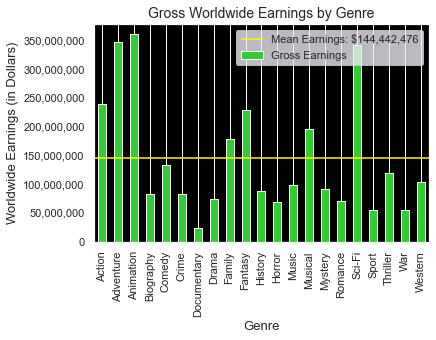

In [107]:
#Plot by Genre and Average Gross Earnings to figure out the most profitable genres. 
genres_df.plot(kind = 'bar', color='limegreen')

#Set up the title of the graph. 
plt.title("Gross Worldwide Earnings by Genre",fontsize = 14)

#Setup the x-axis label and y-axis label of the graph.
plt.xlabel('Genre',fontsize = 13)
plt.ylabel('Worldwide Earnings (in Dollars)',fontsize = 13)
axes = plt.gca()
axes.yaxis.grid()
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
axes.set_yticklabels(['{:,}'.format(int(x)) for x in axes.get_yticks().tolist()])
axes.set(facecolor='black')

#Insert mean gross worldwide earning
plt.hlines(y=genres_df['Gross Earnings'].mean(),xmin=-.5, xmax=20.5,color='yellow',label=f"Mean Earnings: ${genres_df['Gross Earnings'].mean():,.0f}") 

plt.legend()
plt.savefig('genres.png', dpi=300, bbox_inches='tight')
plt.show()

### Analysis and Recommendations 
As shown above, Sci-Fi, Adventure, and Animation are clearly the three genres with the highest average worldwide gross earnings (for films produced since 2010). However, these are oftentimes [the most expensive](https://www.the-numbers.com/movie/budgets) movies to produce--so Microsoft should take into account its start-up capital when deciding which genres of movies to finance first. 

Though the Adventure gentre is highly profitable, it also is known to eat up a [large chunk](https://www.the-numbers.com/market/genres) of the market, and thus presents more competition to a novice studio. Unless Microsoft has the budget and the wherewithall the turn one of their more popular franchises into [a guaranteed moneymaker series](https://screenrant.com/best-video-games-like-star-wars-movies/), one of the more modestly profitable genres might pose less of a financial risk. For example, Family and/or Musical films still yield above-average profitability, as shown in the above analysis. In addition, these genres are generally known to require budgets that fall within a more reasonable range and in turn would present less of a gamble for investors. Finally, genres such as Drama and Comedy occupy [smaller shares](https://www.the-numbers.com/market/genres) of the film market, so a family-oriented drama or comedy may be likely to earn above-average profits while facing less competition at the box office. 

Further analysis on film budgets by genre would help Microsoft gain more insight on the start-up costs that would be necessary to produce films in the most profitable genres. In addition, examining market crowding by genre, while also taking into account ticket sales by genre, would also develop a more complete picture of the degree of competition Microsoft may face as it enters the industry.  

## Analysis 3: Which actors should Microsoft prioritize for hire? 
For this analysis, actor data was cleaned and combined with a rough estimate of actor "cost" to generate recommendations for talent recruitment. 

### Data Cleaning

In [61]:
print(imdb.shape)
print(imdb_names.shape)
print(imdb_principals.shape)

(146144, 32)
(606648, 6)
(1028186, 6)


In [62]:
#Step 1: Clean up names dataframe (get rid of spaces in column titles)
imdb_names.columns.str.replace(' ', '')
imdb_names.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [63]:
# Check for null values in Names dataframe
imdb_names['nconst'].isna().sum()

0

In [64]:
# Check for null values in primary_name as well
imdb_names = imdb_names.sort_values(by=['primary_name'])

In [65]:
#Look for duplicates in nconst and primary_name
names_dupes = imdb_names.loc[imdb_names.duplicated(subset=['primary_name'],keep=False) == True]
names_dupes

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
129377,nm10275444,A. Venkatesh,NaN,NaN,director,tt9319898
387377,nm8956236,A. Venkatesh,NaN,NaN,producer,tt6834466
279631,nm4062141,A. Venkatesh,NaN,NaN,"director,actor,writer","tt4976496,tt6765648,tt4318038,tt6827080"
156216,nm1701176,A. Venkatesh,NaN,NaN,"cinematographer,camera_department,editor","tt0984177,tt0327761,tt0072026,tt4160030"
30159,nm0451160,A.J. Khan,1977.0,NaN,"actress,make_up_department,director","tt0203536,tt1651142,tt0367014,tt0323108"
...,...,...,...,...,...,...
433984,nm6356309,Özgür Bakar,NaN,NaN,"director,writer,producer","tt4368072,tt10046236,tt7717990,tt4764942"
102820,nm2561272,Øystein Mamen,NaN,NaN,"cinematographer,camera_department,editor","tt2713778,tt6275296,tt3541092,tt0966566"
603769,nm8122779,Øystein Mamen,NaN,NaN,cinematographer,tt2660730
93977,nm10211575,Þórunn Lárusdóttir,NaN,NaN,"actor,writer,editor",tt9174804


In [66]:
id_dupes = imdb_names.loc[imdb_names.duplicated(subset=['nconst'],keep=False) == True]
id_dupes

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles


In [67]:
print(names_dupes.shape)
print(imdb_names.shape)
print(50865/606648)

(50865, 6)
(606648, 6)
0.08384598646991336


In [68]:
#Duplicate names account for 8% of my data (though there are no duplicate nconst values)
#I will drop these names since many of them must have different unique IDs as well (see A.Venkatesh, above)
#Since it would be inefficient to go through and figure out the right unique ID for each person, 
#it makes sense to drop for now. 
imdb_names = imdb_names.drop_duplicates(subset=['primary_name'], keep=False,)

In [69]:
#Confirming new shape of dataframe; duplicates should be dropped 
print(imdb_names.shape)
print(606648-555783)

(555783, 6)
50865


In [70]:
#Repeat cleaning process for Principals dataframe
imdb_principals.columns.str.replace(' ', '')
imdb_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [71]:
#Check for null values in Principals dataframe. 
imdb_principals['nconst'].isna().sum()

0

In [72]:
#Sort rows by nconst number
imdb_principals = imdb_principals.sort_values(by=['nconst'])
imdb_principals.head()

,tconst,ordering,nconst,category,job,characters
263152,tt2053352,4,nm0000002,archive_footage,NaN,"[""Herself""]"
15288,tt1626811,4,nm0000002,self,NaN,"[""Herself - Interviewee""]"
223302,tt0858500,2,nm0000002,actress,NaN,"[""May""]"
252036,tt1368858,1,nm0000002,actress,NaN,"[""Anne-Marie""]"
229763,tt1714820,3,nm0000003,archive_footage,NaN,"[""Herself""]"


In [73]:
# Assess duplicates situation - there are a lot of duplicate Unique Person IDs ("nconst"), but...
principals_dupes = imdb_principals.loc[imdb_principals.duplicated(subset=['nconst'],keep=False) == True]
principals_dupes.shape

(582339, 6)

In [74]:
# Each duplicated  Person ID/("nconst") seems to be associated with a Unique Move ID ("tconst"),
# Which makes sense if the same person was in multiple movies. No need to drop these 582,339 duplicates. 
principals_dupes.head()

,tconst,ordering,nconst,category,job,characters
263152,tt2053352,4,nm0000002,archive_footage,NaN,"[""Herself""]"
15288,tt1626811,4,nm0000002,self,NaN,"[""Herself - Interviewee""]"
223302,tt0858500,2,nm0000002,actress,NaN,"[""May""]"
252036,tt1368858,1,nm0000002,actress,NaN,"[""Anne-Marie""]"
229763,tt1714820,3,nm0000003,archive_footage,NaN,"[""Herself""]"


In [75]:
# Checking this hypothesis
imdb_principals.duplicated(subset=['tconst', 'nconst']).sum()

38

In [76]:
# So there are only a small number of rows with both a duplicated Person ID and Movie ID. 
dupe_movies_and_names = imdb_principals.loc[imdb_principals.duplicated(subset=['nconst','tconst'],keep=False) == True]
dupe_movies_and_names.head(10)

,tconst,ordering,nconst,category,job,characters
646999,tt5473578,8,nm0149828,actress,NaN,NaN
646994,tt5473578,3,nm0149828,actress,NaN,NaN
723770,tt4537170,2,nm0172826,actor,NaN,NaN
723776,tt4537170,8,nm0172826,actor,NaN,NaN
695178,tt6549064,2,nm0244327,actress,NaN,"[""Nadeen""]"
695183,tt6549064,7,nm0244327,actress,NaN,"[""Nadeen""]"
647034,tt5495582,1,nm0406809,actor,NaN,NaN
647042,tt5495582,9,nm0406809,actor,NaN,NaN
765019,tt6664852,5,nm0605583,actor,NaN,NaN
765016,tt6664852,2,nm0605583,actor,NaN,NaN


In [77]:
print(dupe_movies_and_names.shape)
# Makes sense because 38*2 = 76 

(76, 6)


In [78]:
# Dropping above duplicates anyway, even though 38 duplicates out of 1,028,186 is pretty insignificant 
imdb_principals = imdb_principals.drop_duplicates(subset=['tconst','nconst'], keep='first')

In [79]:
print(imdb_principals.shape)
print(1028148+38)

(1028148, 6)
1028186


In [80]:
print(imdb_principals.shape)
print(imdb_names.shape)

(1028148, 6)
(555783, 6)


In [81]:
# Merge Principals and Names dataframes to match Unique IDs with actors names; 
#so every actor name can be matched to a unique tconst movie ID. 
principals_and_names = pd.merge(
    imdb_principals,
    imdb_names,
    how='inner',
    on ='nconst')
principals_and_names.head(30)

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt2053352,4,nm0000002,archive_footage,NaN,"[""Herself""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
1,tt1626811,4,nm0000002,self,NaN,"[""Herself - Interviewee""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
2,tt0858500,2,nm0000002,actress,NaN,"[""May""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
3,tt1368858,1,nm0000002,actress,NaN,"[""Anne-Marie""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
4,tt1714820,3,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
5,tt2004245,1,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
6,tt4323536,3,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
7,tt2327430,2,nm0000005,archive_footage,NaN,"[""Himself""]",Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0050976"
8,tt2056773,1,nm0000005,archive_footage,NaN,NaN,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0050976"
9,tt9209768,1,nm0000005,self,NaN,"[""Himself (voice)""]",Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0050976"


In [82]:
principals_and_names.shape
#Resultant dataframe smaller

(946037, 11)

In [83]:
principals_and_names.duplicated(subset=['tconst', 'nconst']).sum()
#No duplicates

0

In [84]:
#Now drop all rows that have a value in "death_year," as we want to recommend actors who are still alive. 
# Get indexes where death_year column has a value
principals_and_names = principals_and_names[principals_and_names['death_year'].isna()]
print(principals_and_names.shape)

(935020, 11)


In [85]:
#Filter out all non-actors and actresses in "primary_profession" column. 
actors = principals_and_names[principals_and_names["primary_profession"].str.contains('actor|actress', na=False)]

In [86]:
actors.shape

(447524, 11)

In [87]:
actors.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
4,tt1714820,3,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
5,tt2004245,1,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
6,tt4323536,3,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
51,tt3169638,9,nm0000047,self,NaN,"[""Herself""]",Sophia Loren,1934.0,NaN,"actress,soundtrack","tt0054749,tt0076085,tt0060121,tt0058335"
52,tt5888614,3,nm0000047,self,NaN,"[""Herself""]",Sophia Loren,1934.0,NaN,"actress,soundtrack","tt0054749,tt0076085,tt0060121,tt0058335"


In [88]:
#Filter out actors born before 1939 (sorry Clint Eastwood)
actors = actors[actors['birth_year'] > 1939]
actors.sort_values(by=['birth_year'])

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
40141,tt6039872,4,nm0111232,actor,NaN,NaN,Tom Brokaw,1940.0,NaN,"writer,producer,actor","tt0436836,tt0231035,tt4005358,tt0103396"
174802,tt1811381,1,nm0905147,actress,NaN,"[""Narrator""]",Jutta Wachowiak,1940.0,NaN,actress,"tt0232146,tt0081711,tt0091367,tt0219849"
141903,tt6400222,2,nm0698928,actor,NaN,NaN,Gilles Proulx,1940.0,NaN,actor,"tt0832275,tt0211914,tt0070933,tt0110390"
84580,tt1650540,8,nm0359372,self,NaN,"[""Himself""]",Herbie Hancock,1940.0,NaN,"soundtrack,composer,actor","tt0094894,tt0090557,tt0060176,tt0071402"
84581,tt3088318,2,nm0359372,self,NaN,"[""Himself""]",Herbie Hancock,1940.0,NaN,"soundtrack,composer,actor","tt0094894,tt0090557,tt0060176,tt0071402"
...,...,...,...,...,...,...,...,...,...,...,...
762422,tt4100182,2,nm6446418,actor,NaN,"[""Guyus""]",Gaius Lee DuPree,2013.0,NaN,"actor,cinematographer","tt4041788,tt3776720,tt4648810,tt4768296"
873540,tt6023560,3,nm8405397,archive_footage,NaN,"[""Herself""]",Indiana Feek,2014.0,NaN,actress,"tt4569878,tt8347504"
220567,tt10360096,3,nm10708650,actress,NaN,"[""Katie""]",Nayana Niter,2014.0,NaN,actress,NaN
201836,tt9392402,1,nm10306475,actress,NaN,"[""Buny""]",Natalye Archiles,2014.0,NaN,actress,"tt9392402,tt6877772,tt9396174"


In [89]:
#Join imdb_ratings and actors dataframe by "tconst" column to match movie IDs, actor, and average rating
#First, check for duplicates in imdb_ratings
imdb_ratings.duplicated().sum()

0

In [90]:
#Then, merge: 
actors_and_ratings = pd.merge(
    actors,
    imdb_ratings,
    how='inner',
    on ='tconst')
actors_and_ratings

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,averagerating,numvotes
0,tt4591310,2,nm0000084,actress,NaN,"[""Baigujing"",""White-Boned Demon""]",Li Gong,1965.0,NaN,actress,"tt0101640,tt0397535,tt0430357,tt0473444",6.0,2587
1,tt4591310,1,nm0477209,actor,NaN,"[""Sun Wukong"",""Monkey King""]",Aaron Kwok,1965.0,NaN,"actor,soundtrack,music_department","tt4417522,tt0165499,tt0768114,tt1691832",6.0,2587
2,tt4591310,3,nm2682046,actor,NaN,"[""Tang Seng""]",Shaofeng Feng,1978.0,NaN,"actor,producer,miscellaneous","tt2176668,tt2102472,tt2992146,tt2909116",6.0,2587
3,tt4591310,4,nm3370295,actor,NaN,"[""Zhu Bajie""]",Shenyang Xiao,1981.0,NaN,"actor,director","tt1462900,tt4591310,tt5290882,tt8793220",6.0,2587
4,tt1092634,2,nm0000084,actress,NaN,"[""Anna Lan-Ting""]",Li Gong,1965.0,NaN,actress,"tt0101640,tt0397535,tt0430357,tt0473444",6.4,8662
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112896,tt8752420,5,nm9822023,director,NaN,NaN,Jorge Tudanca,1999.0,NaN,"director,writer,actor","tt9361888,tt8752420,tt8382210,tt9784954",8.4,10
112897,tt9800694,3,nm9828762,actor,NaN,NaN,Temmuz Gürkan Karaca,1987.0,NaN,actor,"tt1795096,tt2247207,tt7932896,tt9800694",5.4,7
112898,tt3588492,4,nm9836604,actress,NaN,"[""Serpil""]",Ebru Ozturk,1986.0,NaN,actress,tt8412590,4.1,176
112899,tt8478058,2,nm9879092,actor,NaN,"[""James Howard""]",Sali,1948.0,NaN,actor,tt8478058,8.5,6


In [91]:
#Clean up actors_and_ratings columns
actors_and_ratings.columns.str.replace(' ', '')
actors_and_ratings.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,averagerating,numvotes
0,tt4591310,2,nm0000084,actress,NaN,"[""Baigujing"",""White-Boned Demon""]",Li Gong,1965.0,NaN,actress,"tt0101640,tt0397535,tt0430357,tt0473444",6.0,2587
1,tt4591310,1,nm0477209,actor,NaN,"[""Sun Wukong"",""Monkey King""]",Aaron Kwok,1965.0,NaN,"actor,soundtrack,music_department","tt4417522,tt0165499,tt0768114,tt1691832",6.0,2587
2,tt4591310,3,nm2682046,actor,NaN,"[""Tang Seng""]",Shaofeng Feng,1978.0,NaN,"actor,producer,miscellaneous","tt2176668,tt2102472,tt2992146,tt2909116",6.0,2587
3,tt4591310,4,nm3370295,actor,NaN,"[""Zhu Bajie""]",Shenyang Xiao,1981.0,NaN,"actor,director","tt1462900,tt4591310,tt5290882,tt8793220",6.0,2587
4,tt1092634,2,nm0000084,actress,NaN,"[""Anna Lan-Ting""]",Li Gong,1965.0,NaN,actress,"tt0101640,tt0397535,tt0430357,tt0473444",6.4,8662


In [92]:
#Drop distracting columns
actors_and_ratings = actors_and_ratings.drop(['ordering', 'job', 'characters', 'death_year', 'known_for_titles'], axis=1)
actors_and_ratings

,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes
0,tt4591310,nm0000084,actress,Li Gong,1965.0,actress,6.0,2587
1,tt4591310,nm0477209,actor,Aaron Kwok,1965.0,"actor,soundtrack,music_department",6.0,2587
2,tt4591310,nm2682046,actor,Shaofeng Feng,1978.0,"actor,producer,miscellaneous",6.0,2587
3,tt4591310,nm3370295,actor,Shenyang Xiao,1981.0,"actor,director",6.0,2587
4,tt1092634,nm0000084,actress,Li Gong,1965.0,actress,6.4,8662
...,...,...,...,...,...,...,...,...
112896,tt8752420,nm9822023,director,Jorge Tudanca,1999.0,"director,writer,actor",8.4,10
112897,tt9800694,nm9828762,actor,Temmuz Gürkan Karaca,1987.0,actor,5.4,7
112898,tt3588492,nm9836604,actress,Ebru Ozturk,1986.0,actress,4.1,176
112899,tt8478058,nm9879092,actor,Sali,1948.0,actor,8.5,6


In [93]:
print(actors_and_ratings['category'].dtype)

object


In [94]:
#Filter out rows with anything other than "actor" or "actress" in "category" column. 
actors_and_ratings = actors_and_ratings[actors_and_ratings["category"].str.contains('actor|actress', na=False)]
actors_and_ratings

,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes
0,tt4591310,nm0000084,actress,Li Gong,1965.0,actress,6.0,2587
1,tt4591310,nm0477209,actor,Aaron Kwok,1965.0,"actor,soundtrack,music_department",6.0,2587
2,tt4591310,nm2682046,actor,Shaofeng Feng,1978.0,"actor,producer,miscellaneous",6.0,2587
3,tt4591310,nm3370295,actor,Shenyang Xiao,1981.0,"actor,director",6.0,2587
4,tt1092634,nm0000084,actress,Li Gong,1965.0,actress,6.4,8662
...,...,...,...,...,...,...,...,...
112895,tt8262666,nm9758704,actress,Jamie Leo,1999.0,actress,9.1,8
112897,tt9800694,nm9828762,actor,Temmuz Gürkan Karaca,1987.0,actor,5.4,7
112898,tt3588492,nm9836604,actress,Ebru Ozturk,1986.0,actress,4.1,176
112899,tt8478058,nm9879092,actor,Sali,1948.0,actor,8.5,6


### Data Modeling

In [95]:
#Average rating is not the only metric of concern. We have some very highly rated performances 
#that probably won't draw as many crowds because the actors are not popular (for example, Jake Bass, below). 
#I'll create a new column called rating-popularity that multiplies the average rating x the number of votes 
#the performance received, thus serving as a primitive metric for how popular AND how highly rated the performance was. 
actors_and_ratings.sort_values(by=['numvotes'],ascending=False)

,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes
1451,tt1375666,nm0330687,actor,Joseph Gordon-Levitt,1981.0,"actor,producer,soundtrack",8.8,1841066
1450,tt1375666,nm0000138,actor,Leonardo DiCaprio,1974.0,"actor,producer,writer",8.8,1841066
1452,tt1375666,nm0680983,actress,Ellen Page,1987.0,"actress,producer,soundtrack",8.8,1841066
3341,tt1345836,nm0004266,actress,Anne Hathaway,1982.0,"actress,soundtrack,producer",8.4,1387769
3339,tt1345836,nm0000198,actor,Gary Oldman,1958.0,"actor,soundtrack,producer",8.4,1387769
...,...,...,...,...,...,...,...,...
45010,tt5592728,nm1560523,actress,Mythili,1990.0,"actress,soundtrack",4.6,5
45009,tt5592728,nm0558593,actor,Joy Mathew,1961.0,"actor,writer,director",4.6,5
31981,tt2017703,nm0048273,actress,Blanche Baker,1956.0,"actress,writer,producer",8.4,5
111867,tt3546868,nm5658430,actor,Jake Bass,1991.0,actor,9.2,5


In [96]:
actors_and_ratings['popularity_&_rating'] = actors_and_ratings['averagerating'] * actors_and_ratings['numvotes']
actors_and_ratings.sort_values(by=['popularity_&_rating'],ascending=False)

<ipython-input-96-b3585c45e334>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actors_and_ratings['popularity_&_rating'] = actors_and_ratings['averagerating'] * actors_and_ratings['numvotes']


,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes,popularity_&_rating
1450,tt1375666,nm0000138,actor,Leonardo DiCaprio,1974.0,"actor,producer,writer",8.8,1841066,16201380.8
1452,tt1375666,nm0680983,actress,Ellen Page,1987.0,"actress,producer,soundtrack",8.8,1841066,16201380.8
1451,tt1375666,nm0330687,actor,Joseph Gordon-Levitt,1981.0,"actor,producer,soundtrack",8.8,1841066,16201380.8
3340,tt1345836,nm0000288,actor,Christian Bale,1974.0,"actor,editorial_department,producer",8.4,1387769,11657259.6
3339,tt1345836,nm0000198,actor,Gary Oldman,1958.0,"actor,soundtrack,producer",8.4,1387769,11657259.6
...,...,...,...,...,...,...,...,...,...
77524,tt6792126,nm2511348,actress,Anna Kulovaná,1981.0,actress,1.0,5,5.0
77525,tt6792126,nm4153825,actor,Petr Batek,1972.0,actor,1.0,5,5.0
42531,tt8446392,nm0129648,actress,Nathalie Caldonazzo,1969.0,actress,1.0,5,5.0
77522,tt6792126,nm0603184,actress,Dana Morávková,1971.0,"actress,soundtrack,miscellaneous",1.0,5,5.0


In [97]:
#Drop unnecessary columns to prepare to groupby
simple_actors_and_ratings = actors_and_ratings.drop(['tconst','nconst','category','birth_year','primary_profession','averagerating','numvotes'], axis=1)
simple_actors_and_ratings.sort_values(by=['popularity_&_rating'],ascending=False)

,primary_name,popularity_&_rating
1450,Leonardo DiCaprio,16201380.8
1452,Ellen Page,16201380.8
1451,Joseph Gordon-Levitt,16201380.8
3340,Christian Bale,11657259.6
3339,Gary Oldman,11657259.6
...,...,...
77524,Anna Kulovaná,5.0
77525,Petr Batek,5.0
42531,Nathalie Caldonazzo,5.0
77522,Dana Morávková,5.0


In [98]:
#The top 5 actors above are most likely all at the top because they were in Inception 
#We need to aggregate by average rating to take into account number of movies an actor has been in, 
#So the data is not skewed towards actors who have been in a single megahit movie like Inception. 
# Group by nconst and then get name later on; merge on nconst 
actors_ranking = simple_actors_and_ratings.groupby(by=['primary_name']).agg(['mean','count'],as_index=False)
actors_ranking = actors_ranking.rename(columns={'mean':'pop_and_reviews','count':'count'})
actors_ranking.columns = actors_ranking.columns.droplevel(0)
actors_ranking = actors_ranking.sort_values(by=['pop_and_reviews'],ascending=False)
actors_ranking

,pop_and_reviews,count
primary_name,,
Leonardo DiCaprio,5.199703e+06,10
Idina Menzel,3.877485e+06,1
Robert Downey Jr.,3.751984e+06,13
Lucy Davis,3.656452e+06,1
Daniel Kaluuya,3.083650e+06,1
...,...,...
Ying-Hsuan Kao,6.000000e+00,1
Nathalie Caldonazzo,5.000000e+00,1
Ladislav Ondrej,5.000000e+00,1


In [99]:
#Our list above is now aggregated by average rating and popular rating. Truncating to two bullets:  
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [100]:
#Selecting only the top 30 actors based on our performance rating above (average reviews x popularity)
top_30 = actors_ranking.head(30)
top_30

,pop_and_reviews,count
primary_name,,
Leonardo DiCaprio,5199703.07,10
Idina Menzel,3877485.00,1
Robert Downey Jr.,3751983.99,13
Lucy Davis,3656452.50,1
Daniel Kaluuya,3083649.80,1
Donna Murphy,2857654.80,1
Ben Hardy,2763728.00,1
Alison Sudol,2667076.90,1
Kerry Washington,2605709.48,4


In [101]:
# Importing CSV of net worth for 30 top actors - this will be our rough stand-in for the relative "cost" of hiring an actor. 
top30_networth = pd.read_csv('data/zippedData/top30_networth.csv')
top30_networth = top30_networth.drop(columns = ['Unnamed: 2'], axis = 1)

In [102]:
#Joining actor performance dataframe to net worth dataframe
top_30_join = pd.merge(
    top_30,
    top30_networth,
    how='inner',
    on ='primary_name')
top_30_join = top_30_join.drop(columns = ['count'], axis =1)
top_30_join['performance_rating'] = top_30_join['pop_and_reviews']/1000000
top_30_join['cost_rating'] = top_30_join['est_net_worth']/1000000
top_30_join['cost_rating'] = top_30_join['cost_rating'].astype(int)
top_30_join = top_30_join.round({'performance_rating':2})
top_30_join

,primary_name,pop_and_reviews,est_net_worth,performance_rating,cost_rating
0,Leonardo DiCaprio,5199703.07,260000000,5.20,260
1,Idina Menzel,3877485.00,16000000,3.88,16
2,Robert Downey Jr.,3751983.99,300000000,3.75,300
3,Lucy Davis,3656452.50,3000000,3.66,3
4,Daniel Kaluuya,3083649.80,1000000,3.08,1
5,Donna Murphy,2857654.80,3000000,2.86,3
6,Ben Hardy,2763728.00,4000000,2.76,4
7,Alison Sudol,2667076.90,2000000,2.67,2
8,Kerry Washington,2605709.48,55000000,2.61,55
9,Kieran Culkin,2545035.00,5000000,2.55,5


In [112]:
#Plotting cost vs. performance ratings for top 30 actors. 
import plotly.express as px

fig = px.scatter(top_30_join, x="cost_rating", y="performance_rating",
                 hover_name="primary_name",labels=dict(performance_rating="Performance Rating", cost_rating="Cost Rating"))

fig.update_layout(
    title={
        'text': "Performance vs. Cost, for Top 30 Actors",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(grid_ygap=0.2, plot_bgcolor='black')

#fig.update_xaxes(
    #constrain="domain",  # meanwhile compresses the xaxis by decreasing its "domain"


#fig.update_yaxes(
    #scaleanchor = "x",
    #scaleratio = 1
                
fig.update_traces(marker_size=9, marker_color='limegreen',selector=dict(type='scatter'))

fig.show()

### Analysis and Recommendations 
As displayed in the above plot, there are indeed several prominent, "big name" celebrities--also highly rated--that Microsoft, if name recognition is a priority, could opt to hire. Leonardo DiCaprio is the most highly-rated actor in the Top 30 with a performance rating of 5.20 and Robert Downey, Jr. at 3.75. If Microsoft is intending to produce a big-budget Adventure or Sci-Fi blockbuster (as discussed in Recommendation 2), and cost is a secondary consideration, hiring one of these more high-profile actors, both of whom have previous experience completing work in the Adventure genre. 

However, if budget remains an important factor, I would encourage Microsoft to consider those actors whom are perhaps not as high-profile, but nevertheless whom rated fairly highly in our model. For example, the actress Idina Menzel was rated a 3.88 on our performance scale (almost as high as Leo, and higher than Robert Downey, Jr.), while having a cost rating of 16, versus DiCaprio's and Downey's ratings of 300+. Lucy Davis' performances were rated as near-comparable at 3.66, and her cost rating of 3 is even more budget-friendly. Daniel Kuluuya's performances were rated higher than both Vin Diesel and Scarlett Johansson, while maintaining one of the lowest cost ratings at 1 (by comparison, Scarlett Johannson and Vin Diesel's cost ratings were both over 100). Donna Murphy, Ben Hardy, Alison Sudol, Kieran Culkin were also identified in the model as having performances that were more highly-rated and popular than prominent actors such as Jamie Foxx, Chris Hemsworth, and Christian Bale. 

I recommend that Microsoft consider actors like the above, who, although less prominent, may represent better "return-on-investment" than more prominent actors who may be far more costly to hire. 

Further analysis would help identify a broader pool of actors (such as the top 50 or 100) that would help Microsoft diversity its talent pool to accommodate different film genres. In addition, the model could be refined to further take into account the advantage of some actors' starring in several highly popular movies, which could have an outsize affect on their popularity ratings. 

## Conclusions and Recommendations
This analysis leads to three recommendations for Microsoft executives: 
* **Consider timing releases for off-peak months that still show signs of above-average audience turnout,** such as the months of February and September. This will help Microsoft circumvent some of the competition from other studios during the "cluster" months, while also providing opportunities for their products to enjoy above-average popularity. 
* **If startup funding is a significant pain point, consider lower-budget movie genres such as family and musical films,** which tend to earn above-average worldwide gross earnings and are generally known to be cheaper to produce. 
* **Look beyond big-name actors** and engage in recruiting from a pool of lesser-known talent that have the potential to appeal to both mainstream audiences and film critics. 

## Evaluation and Next Steps
The above models utilized the most wide-ranging film-related datasets publicly available, and the results would most likely generalize beyond the data used in this particular dataset. 

These models are reliable because they  reflect widely-accepted trends in the film industry (e.g., films released during the holidays are more popular; adventure films are higher-grossing than documentaries; Leonardo DiCaprio is a highly-rated actor). 

However, these models are also useful for Microsoft because they also uncover windows of opportunity for executives to maximize profit and/or minimize cost--for example, releasing movies in the promising month of February, or hiring lower-profile but high-potential actors. 

As stated in each of the three analysis sections, further analysis could provide opportunities for:
1. More insight into seasonal release trends and their potential impacts on films' popularity;
2. Deeper understanding of the start-up costs and competitition related to each film genre;
3. A wider pool of high-potential actors for Microsoft producers to consider. 